This project is to impelement ML methods on measurement of transcriptome assembly's quality using an evaluation matrix, aiming to establish an unbiased model in quality prediction(determine a more effecitve and simpler matrix). 

On top of the explorative study in "ML_assemblyQuality_v0&v1", speicifically, I
- incorporated both ref-guided and ref-free datasets
- splited dataset in "60%-20%-20%", which denoted training, cross validation and testing
- examed Random forest method performance, determine the most weighted impact factors ( features)

                                                                       -- by Chenming Cui

## item1. Data clean and preparation

In [17]:
# 1.1 import data from excel spread sheet
import xlrd
import pandas as pd
from pandas import ExcelFile

xls = pd.ExcelFile('/Users/chenmingcui/Documents/PhD_work/PhD_Project/AssemblyQuality/MachineLearning_projects/transrate_all+coveragefixed.xlsx')
df1 = pd.read_excel (xls,'all_ref')
df2 = pd.read_excel (xls,'all_denovo')

print('-----------------------------df1,all_ref head--------------------------------')
#df1.head()

#df2.head()
#1.2 remove rows that missing vaules (busco has missing values):
df1 = df1.dropna()
  # 68 rows × 73 columns
df2 = df2.dropna()  
  # 68 rows × 74 columns
#1.3 remove non-relevant columns: this removal is based on personal personal experience
# some feature selection methods like clustering can be applied in an alternative approach.
list(df1.columns.values)

quality_df1 = df1.drop(columns=['CRBB_hits','assembly','stage','genus','specie','accession','rsem_score',
                              'score','optimal_score','weighted','Number of Reads saved as Single Reads',
                              'Discared'])
quality_df1.head()


# one more drop for denovo dataset: kc_score
quality_df2 = df2.drop(columns=['CRBB_hits','assembly','stage','genus','specie','accession','kc_score','rsem_score',
                              'score','optimal_score','weighted','Number of Reads saved as Single Reads',
                              'Discared'])
quality_df2.head()

# print(list(quality_df1.columns.values), end='')
# print(list(df2.columns.values), end='')

# check if data has same columns before combine them

quality_df1.columns.values.sort()
quality_df2.columns.values.sort()
#quality_df1.columns.values == quality_df2.columns.values

#combine quality_df1 and quality_df2
quality_df = pd.concat([quality_df1, quality_df2])
#quality_df.head()
#quality_df.columns.values()
print('----------------------- combined, cleaned data -------------------------------')
print(list(quality_df.columns.values), end='')

-----------------------------df1,all_ref head--------------------------------
----------------------- combined, cleaned data -------------------------------
['Assembly', 'Filtered Number of Paired Reads', 'Total Number of Read 1', 'Total Number of Read 2', 'at_skew', 'bad_mappings', 'bases_n', 'bases_uncovered', 'busco_completeness%', 'contigs_lowcovered', 'contigs_segmented', 'contigs_uncovbase', 'contigs_uncovered', 'cov25', 'cov50', 'cov75', 'cov85', 'cov95', 'cpg_ratio', 'cutoff', 'fragments', 'fragments_mapped', 'gc', 'gc_skew', 'good_mappings', 'largest', 'linguistic_complexity', 'mean_len', 'mean_orf_percent', 'n10', 'n30', 'n50', 'n70', 'n90', 'n_bases', 'n_contigs_with_CRBB', 'n_over_10k', 'n_over_1k', 'n_refs_with_CRBB', 'n_seqs', 'n_under_200', 'n_with_orf', 'p_bases_uncovered', 'p_contigs_lowcovered', 'p_contigs_segmented', 'p_contigs_uncovbase', 'p_contigs_uncovered', 'p_contigs_with_CRBB', 'p_cov25', 'p_cov50', 'p_cov75', 'p_cov85', 'p_cov95', 'p_fragments_mapped', 'p_goo

## item2. Feature selection

In [3]:
# quality_df = quality_df.drop(columns=['bad_mappings'])

## item3. Prepare y and x

In [21]:
# define x and y in the regression
X = quality_df.loc[:, quality_df.columns != 'busco_completeness%']
y = quality_df['busco_completeness%']*0.01
print(list(X.columns.values), end='')

['Assembly', 'Filtered Number of Paired Reads', 'Total Number of Read 1', 'Total Number of Read 2', 'at_skew', 'bad_mappings', 'bases_n', 'bases_uncovered', 'contigs_lowcovered', 'contigs_segmented', 'contigs_uncovbase', 'contigs_uncovered', 'cov25', 'cov50', 'cov75', 'cov85', 'cov95', 'cpg_ratio', 'cutoff', 'fragments', 'fragments_mapped', 'gc', 'gc_skew', 'good_mappings', 'largest', 'linguistic_complexity', 'mean_len', 'mean_orf_percent', 'n10', 'n30', 'n50', 'n70', 'n90', 'n_bases', 'n_contigs_with_CRBB', 'n_over_10k', 'n_over_1k', 'n_refs_with_CRBB', 'n_seqs', 'n_under_200', 'n_with_orf', 'p_bases_uncovered', 'p_contigs_lowcovered', 'p_contigs_segmented', 'p_contigs_uncovbase', 'p_contigs_uncovered', 'p_contigs_with_CRBB', 'p_cov25', 'p_cov50', 'p_cov75', 'p_cov85', 'p_cov95', 'p_fragments_mapped', 'p_good_mapping', 'p_refs_with_CRBB', 'potential_bridges', 'proportion_n', 'rbh_per_reference', 'reference_coverage', 'smallest']

## item4. Split data: Train/Test/Validation

In [5]:
# import numpy as np
# train, validate, test = np.split(quality_df.sample(frac=1), [int(.6*len(quality_df)), int(.8*len(quality_df))])

from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# split the data (60%-20%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)



/Users/chenmingcui/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## item5. Fit model: random forest

In [6]:
from sklearn.ensemble import RandomForestRegressor



clf = RandomForestRegressor( max_features = 35, random_state = 0)
#clf = RandomForestRegressor(n_estimators=10, max_features = 18, random_state = 0)
clf.fit(X_train, y_train)

print('Accuracy of RF regressor on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF regressor on validation set: {:.2f}'
     .format(clf.score(X_val, y_val)))
print('Accuracy of RF regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RF regressor on training set: 0.98
Accuracy of RF regressor on validation set: 0.93
Accuracy of RF regressor on test set: 0.93


/Users/chenmingcui/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
clf.predict(X_test)


array([228.617, 243.071, 181.171, 167.357, 176.868, 176.265, 162.529,
       164.338, 185.03 , 207.577, 233.466, 224.185, 158.374, 255.055,
       173.234, 237.98 , 132.894, 182.783, 247.365, 166.08 , 172.719,
       158.836, 181.382, 152.615, 191.094, 203.749, 234.501, 227.088])

Text(0.5,1,'Variable Importance')

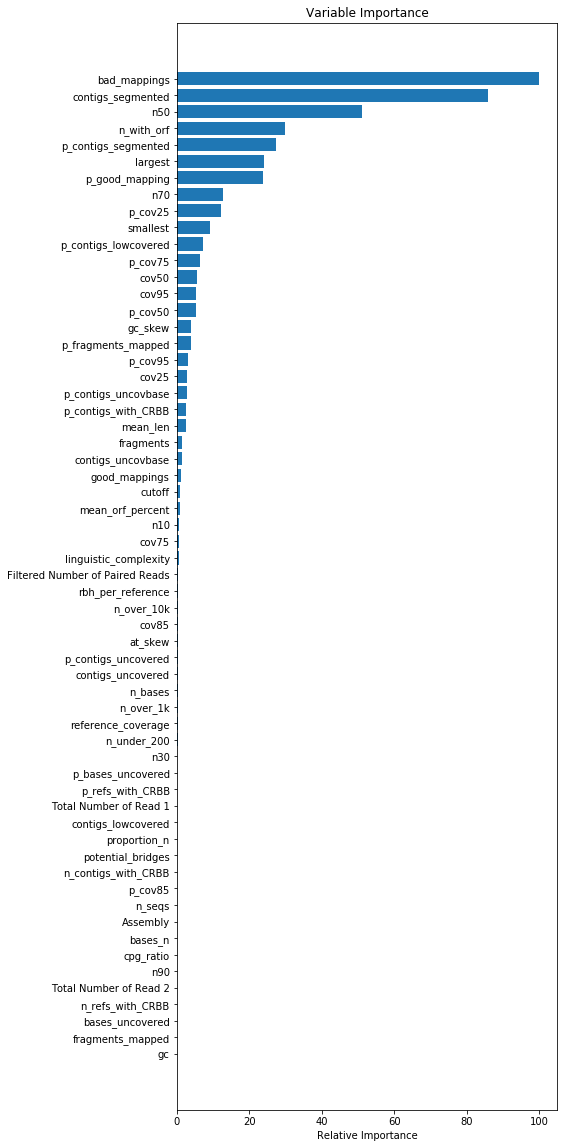

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns.values[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [37]:
import sys
sys.executable

'/Users/chenmingcui/anaconda3/bin/python'